In [1]:
import numpy as np
%load_ext autoreload

Notebook by **Maxime Dion** <maxime.dion@usherbrooke.ca><br>
For the QSciTech-QuantumBC virtual workshop on gate-based quantum computing

## Tutorial for  Activity 3.2

For this activity, make sure you can easily import your versions of `Hamiltonian.py`, `PauliString.py` and `Mapping.py` that you have completed in the Activity 3.1 tutorial. You will also need your verions of `Evaluator.py` and `Solver.py`. Placing this notebook in the same `path` as these files is the easiest way to acheive this. At the end of this notebook, you should be in good position to complete these 2 additionnal files.

The solution we suggest here is NOT mandatory. If you find ways to make it better and more efficient, go on and impress us! On the other hand, by completing all sections of this notebook you'll be able to :
- Prepare a Quantum State based on a varitional form (circuit);
- Measure qubits in the X, Y and Z basis;
- Estimate expectation value of Pauli String on a quantum state;
- Evaluate the expectation value of an Hamiltonian in the form of a Linear Combinaison of Pauli Strings;
- Run a minimization algorithm on the energy expectation fonction to find the ground state of a Hamiltonian;
- Dance to express your overwhelming sense of accomplishment

**Important**

When you modify and save a `*.py` file you need to re-import it so that your modifications can be taken into account when you re-execute a call. By adding the magic command `%autoreload` at the beginning of a cell, you make sure that the modifications you did to the `*.py` files are taken into account when you re-run a celll and that you can see the effect.

If you encounter unusual results, restart the kernel and try again.

**Note on numbering**

When you ask a question in the Slack channel you can refer to the section name or the section number.

To enable the section numbering, please make sure you install [nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html). It is available in the conda distribution. After installation it you need to enable the option 'Table of contents (2)'.

# Variationnal Quantum States

Every quantum circuit starts with all qubits in the the state $|0\rangle$. In order to prepare a quantum state $|\psi\rangle$ we need to prepare a `QuantumCircuit` that will modify the states of the qubits in order to get this specific state. The action of a circuit can always be represented as a unitiary operator.

\begin{align}
    |\psi\rangle &= \hat{U} |0 \ldots 0\rangle
\end{align}

For a parametric state the `QuantumCircuit` and therefore the unitary $U$ will depend on some parameters that we wirte as $\boldsymbol{\theta}$.

\begin{align}
    |\psi(\boldsymbol{\theta})\rangle &= \hat{U}(\boldsymbol{\theta}) |0 \ldots 0\rangle
\end{align}

We will see 2 ways to define Parametrized Quantum Circuits that represent Variationnal Quantum States. For the first method we only need the `QuantumCircuit` class from `qiskit.circuit`.

In [2]:
from qiskit.circuit import QuantumCircuit

## Generating function
The easiest way to generate a parametrized `QuantumCircuit` is to implement a function that takes parameters as arguments and returns a `QuantumCircuit`. Here is such a function that generates a 2 qubits QuantumCircuit.

In [3]:
def example_2qubits_2params_quantum_circuit(theta,phi):
    qc = QuantumCircuit(2)
    qc.ry(theta,0)
    qc.rz(phi,0)
    qc.cx(0,1)
    return qc

To visualize this circuit we first need to call the generating function with dummy argument values for it to return a circuit. We can draw the circuit. The `'mpl'` option draws the circuit in a fancy way using `matplotlib`. If you are experiencing problems, you can remove this option.

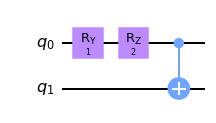

In [4]:
varform_qc = example_2qubits_2params_quantum_circuit
qc = varform_qc(1,2)
qc.draw('mpl')

## Using qiskit parameter

The other way to generate a parametrized `QuantumCircuit` is to use the `Parameter` class in `qiskit`.

In [5]:
from qiskit.circuit import Parameter

Here is the same circuit as before done with this method.

In [6]:
a = Parameter('a')
b = Parameter('b')
varform_qc = QuantumCircuit(2)
varform_qc.ry(a,0)
varform_qc.rz(b,0)
varform_qc.cx(0,1)

Done this way the parametrized circuit can be drawn right away.

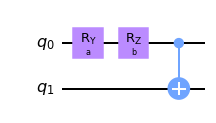

In [7]:
varform_qc.draw('mpl')

To see what are the parameters of a parametrized `QuantumCircuit` you can use

In [8]:
varform_qc.parameters

{Parameter(a), Parameter(b)}

**Important** Beware that sometimes the parameters will not appear in the same order as you declared them!

To assign values to the different parameters we need to use the `QuantumCircuit.assign_paremeters()` method. This methods takes a `dict` as an argument containing the `Parameter`s and their `value`s.

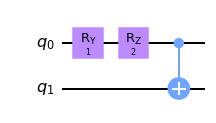

In [9]:
param_dict = {a : 1, b : 2}
qc = varform_qc.assign_parameters(param_dict)
qc.draw('mpl')

If you want to provide the parameter values as a `list` or a `np.array` you can build the `dict` directly. Just make sure that the order you use in `param_values` corresponds to the other of `varform_qc.parameters`.

In [10]:
param_values = [1, 2]
param_dict = dict(zip(varform_qc.parameters,param_values))
print(param_dict)

{Parameter(a): 1, Parameter(b): 2}


## Varforms circuits for H2
Using the method of you choice, prepare 2 different 4-qubit `QuantumCircuit`s. 
- The first should take 1 parameter to cover the real coefficients state sub space spanned by $|0101\rangle$ and $|1010\rangle$.
- The second should take 3 parameters to cover the real coefficients state sub space spanned by $|0101\rangle$, $|0110\rangle$, $|1001\rangle$ and $|1010\rangle$.

Revisit the presentation to find such circuits.

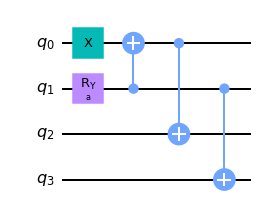

In [11]:
varform_4qubits_1param = QuantumCircuit(4)
a = Parameter('a')
"""
Your code here

"""
varform_4qubits_1param.ry(a,1)
varform_4qubits_1param.x(0)
varform_4qubits_1param.cx(1,0)
varform_4qubits_1param.cx(0,2)
varform_4qubits_1param.cx(1,3)

varform_4qubits_1param.draw('mpl')



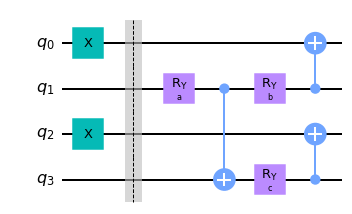

In [12]:
varform_4qubits_3params = QuantumCircuit(4)
a = Parameter('a')
b = Parameter('b')
c = Parameter('c')
"""
Your code here
"""
varform_4qubits_3params.x(0)
varform_4qubits_3params.x(2)
varform_4qubits_3params.barrier()
varform_4qubits_3params.ry(a,1)
varform_4qubits_3params.cx(1,3)
varform_4qubits_3params.ry(b,1)
varform_4qubits_3params.ry(c,3)
varform_4qubits_3params.cx(1,0)
varform_4qubits_3params.cx(3,2)
varform_4qubits_3params.draw('mpl')

# Evaluator
The `Evaluator` is an object that will help us to evaluate the expectation value of a quantum operator (`LCPS`) on a specific variational form and backend. To initialize and `Evaluator` you should provide :

**Mandatory**
- A **variationnal form** that can create a `QuantumCircuit` given a set of `params`;
- A **backend** `qiskit.Backend` (a simulator or an actual device handle) on which to run the `QuantumCircuit`

**Optionnal**
- `execute_opt` is a `dict` containing the optionnal argument to pass to the `qiskit.execute` method (ex : `{'shots' : 1024}`.
- `measure_filter` a `qiskit.ignis...MeasurementFilter` that can be applied to the result of a circuit executation to mitigate readout errors.

The creation/usage of an `Evaluator` such as `BasicEvaluator` goes like this :

<code>
evaluator = BasicEvaluator(varform_qc,backend)<br>evaluator.set_linear_combinaison_pauli_string(operator_lcps)<br>expected_value = evaluator.eval(params)
</code>

First you initialize the evaluator.

Next, you provide the operator you want to evaluate using the `set_linear_combinaison_pauli_string(LCPS)` method. 

Finally, you call the `eval(params)` method that will return the estimation of the operator's expected value. Mathematicaly, the use of this method corresponds to 

\begin{align}
E(\boldsymbol{\theta}).
\end{align}

We will now go through the different pieces neccessary to complete the `Evaluator` class.

## Static methods
Being static, these method do not need an instance of a class to be used. They can be called directly from the class.

These methods are called before the first call to `eval(params)`. Most of these methods are implemented inside the abstract class `Evaluator` (except for `prepare_measurement_circuits_and_interpreters(LCPS)`)

### Pauli Based Measurements
We have seen that even if a quantum computer can only measure qubits in the Z-basis, the X and Y-basis are accessible if we *rotate* the quantum state before measuring. 

Implement the `@staticmethod` : `pauli_string_based_measurement(PauliString)` in the `Evaluator` class in file `Evaluator.py` that returns a `QuantumCircuit` that measures each qubit in the basis given by the `PauliString`.

First we import the abstract class `Evaluator` and the `PauliString` class.

In [13]:
from evaluator import Evaluator
from pauli_string import PauliString

Test your code with the next cell.

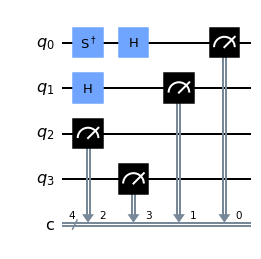

In [14]:
%autoreload
pauli_string = PauliString.from_str('ZIXY')
measure_qc = Evaluator.pauli_string_based_measurement(pauli_string)
measure_qc.draw('mpl')

### Measurable eigenvalues

Implement the `@staticmethod` : `measurable_eigenvalues(PauliString)` in the `Evaluator` class in file `Evaluator.py` that returns a `np.array` that contains the eigenvalues of the measurable `PauliString` for each basis state. We noted this vector

\begin{align}
    \Lambda_q^{\hat{(\mathcal{P})}}.
\end{align}

Be mindful of the order of the basis state.

\begin{align}
    0000, 0001, 0010, \ldots, 1110, 1111 
\end{align}

You can test your implementation on the `ZIXY` Pauli string.

In [15]:
%autoreload
pauli_string = PauliString.from_str('ZIXZ')
measurable_eigenvalues = Evaluator.measurable_eigenvalues(pauli_string)
print(measurable_eigenvalues)

[ 1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1]


For the `PauliString` `'ZIXY'` (measurable `'ZIZZ'`) you should get the following eigenvalues :

<code>
[ 1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1]
</code>

### Measurement Circuits and Interpreters
The `prepare_measurement_circuits_and_interpreters(LCPS)` is specific to the sub-type of `Evaluator`. The two different types of `Evaluator`s considered in this workshop are :
- The `BasicEvaluator` will run a single `QuantumCircuit` for each `PauliString` present in the provided `LCPS`.
- The `BitwiseCommutingCliqueEvaluator` will exploit Bitwise Commuting Clique to combine the evaluation of Commuting `PauliStrin`s and reduce the number of different `QuantumCircuit` run for each evaluation. 

Implement the `prepare_measurement_circuits_and_interpreters(LCPS)` method in the `BasicEvaluator` class in file `Evaluator.py`. This method should return 2 `list`. The first should contain one measurement `QuantumCircuit` for each `PauliString` in the `LCPS`. The second list should contain one `np.array` of the eigenvalues of the measurable `PauliString` for each basis state.

**Note** You can try to implement similar methods for the `BitwiseCommutingCliqueEvaluator`.

You can test your method on `2 ZIXY + 1 IXYZ`.

In [16]:
from evaluator import BasicEvaluator

In [17]:
%autoreload
lcps = 2*PauliString.from_str('ZIXY') + 1*PauliString.from_str('IXYZ')
measurement_circuits, interpreters = BasicEvaluator.prepare_measurement_circuits_and_interpreters(lcps)

You can visualize the interpreter and the measurement circuit for each term in the `LCPS` by using `i = 0` and `i = 1`.

[ 1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j]


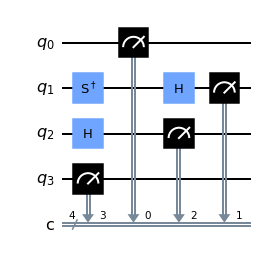

In [18]:
i = 1
print(interpreters[i])
measurement_circuits[i].draw('mpl')

The interpreters should be respectively :

<code>
[ 2 -2 -2  2  2 -2 -2  2 -2  2  2 -2 -2  2  2 -2]<br>[ 1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1]
</code>

### Set the LCPS
The method `set_linear_combinaison_pauli_string(LCPS)` is already implemented inside the abstract class `Evaluator`. Please take a look at it to notice that this method makes an immediate call to the `prepare_measurement_circuits_and_interpreters(LCPS)` method you have just implemented. The `measurement_circuits` and `interpreters` are also stored in attributes of the same name.

## Methods called inside `eval(params)`
Since we are entering the action of the `eval(params)` method we will need to instantiate an `Evaluator`. This will require a `backend`. We will use a local `qasm_simulator` for now, which is part of the `Aer` module. In the futur, you can use a different `backend`. We will also soon need the `execute` method.

In [19]:
from qiskit import Aer, execute
qasm_simulator = Aer.get_backend('qasm_simulator')

### Circuit preparation
The `prepare_eval_circuits(params)` will combine the variationnal form with these measurement `QuantumCircuit`s to form the complete circuit to be run. This method has 2 tasks :
- Assign the `params` to the variationnal form to get a `QuantumCircuit` that prepares the quantum state
- Combine this circuit with all the measurement circuits to return as many `QuantumCircuit` inside a `list`.

Implement this method inside the `Evaluator` class and test it here.

In [20]:
%autoreload
lcps = 2*PauliString.from_str('ZXZX') + 1*PauliString.from_str('IIZZ')
varform = varform_4qubits_1param
backend = qasm_simulator
evaluator = BasicEvaluator(varform,backend)
evaluator.set_linear_combinaison_pauli_string(lcps)
params = [0,]
eval_circuits = evaluator.prepare_eval_circuits(params)

You can take a look at the `QuantumCircuit` for the first (`i=0`) and second (`i=1`) PauliString. What you should get is a circuit that begins with the state preparation circuit with the `params` applied to it followed by the measurement circuit.

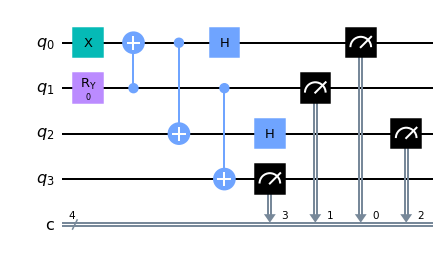

In [21]:
i = 0
eval_circuits[i].draw('mpl')

### Execution
The ultimate goal to the execution of a circuit is to get the number of times each basis state is measured. Let's execute our `eval_circuits`. We can run many `QuantumCircuit`s at the same time by placing them into a `list`, which they already are!

In [22]:
execute_opts = {'shots' : 1024}
job = execute(eval_circuits,backend=qasm_simulator,**execute_opts)
result = job.result()

We can get the number of counts of each state for the execution of a given circuit with the follow lines. The counts are returned as a `dict`.

In [23]:
i = 0
#i = 1
counts = result.get_counts(eval_circuits[i])
print(counts)

{'0000': 262, '0001': 250, '0100': 246, '0101': 266}


If you `eval_circuits` are correct, you should get for, `i = 0` and `i = 1` respectively, something like this (exact value may vary since there is some randomness in the executation of a quantum circuit)

<code>
{'0000': 266, '0001': 262, '0100': 240, '0101': 256}<br>{'0101': 1024}  
</code>

### counts2array

We will transform this `dict` into an array with the `counts2array` method.  Implement this method that will return the vector $N_q$. Be mindful of the order of the basis state.

\begin{align}
    0000, 0001, 0010, \ldots, 1110, 1111 
\end{align}

**optional remark** While doing this will allow us to interpret the counts with a simple inner product, this implies creating an array of size $2^n$ where $n$ is the numbers of qubits. This might not be such a good idea for larger systems and the use of a `dict` might be more appropriate. Can you interpret the counts efficiently while keeping them into a `dict`?

In [24]:
%autoreload
i = 0
counts = result.get_counts(eval_circuits[i])
evaluator.counts2array(counts)

array([262, 250,   0,   0, 246, 266,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0])

For `i=0` in particular you should get something similar to:

<code>
array([228., 276.,   0.,   0., 269., 251.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])
</code>

### Interpret counts
The action of interpreting the counts is actually the task of estimating the expectation value of a `PauliString` an multiplying by the coefficient associated with this `PauliString` in the LCPS. Implemented the `interpret_count_array` method that should return an array with the values for this expression.

\begin{align}
    h_i \langle \hat{\mathcal{P}}_i \rangle = \frac{h_i}{N_\text{tot}}\sum_{q} N_q \Lambda_q^{(\hat{\mathcal{P}}_i)}
\end{align}

In [25]:
%autoreload
i = 1
counts_array = evaluator.counts2array(result.get_counts(eval_circuits[i]))
interpreter = evaluator.interpreters[i]
expected_value = evaluator.interpret_count_array(interpreter,counts_array)
print(expected_value)

(-1+0j)


You should get something close to `0` for the first one and `-1` for the second.

### Evaluation
You have now all the pieces to complete the `eval(params)` method. This method should use all the methods you've implemented since the section *Methods called inside `eval(params)`* and then sum all the interpreted values. Mathematicaly, it should return the value of the expression

\begin{align}
    E(\boldsymbol{\theta}) = \sum_i h_i \langle\psi(\boldsymbol{\theta}) | \hat{\mathcal{P}}_i | \psi(\boldsymbol{\theta}) \rangle.
\end{align}

In [26]:
%autoreload
lcps = 2*PauliString.from_str('ZXZX') + 1*PauliString.from_str('IIZZ')
varform = varform_4qubits_1param
backend = qasm_simulator
execute_opts = {'shots' : 1024}
evaluator = BasicEvaluator(varform,backend,execute_opts = execute_opts)
evaluator.set_linear_combinaison_pauli_string(lcps)
params = [0,]
expected_value = evaluator.eval(params)
print(expected_value)

-1.0625


Yes that's right, your code now returns an estimate of the expression

\begin{align}
    E(\theta) = \langle \psi(\theta) | \hat{\mathcal{H}} | \psi(\theta) \rangle.
\end{align} 

for

\begin{align}
    \hat{\mathcal{H}} = 2\times \hat{Z}\hat{X}\hat{Z}\hat{X} + 1\times \hat{I}\hat{I}\hat{Z}\hat{Z}
\end{align} 

and the varform `varform_4qubits_1param` for $\theta = 0$. The `evaluator.eval(params)` is now a method you can call like a function and it will return the energy $E(\theta)$.

Now comes the time to test this on the $\text{H}_2$ molecule Hamiltonian!

## The Hamiltonian evaluation test

We will now import the classes from the previous activity.

In [27]:
from hamiltonian import MolecularFermionicHamiltonian
from Mapping import JordanWigner

For ease of use we will import the integral values instead of using `pyscf`. We also import the Coulomb repulsion energy for later use. By now we are experts in building the Hamiltonian.

In [28]:
with open('Integrals_sto-3g_H2_d_0.7350_no_spin.npz','rb') as f:
    out = np.load(f)
    h1_load_no_spin = out['h1']
    h2_load_no_spin = out['h2']
    energy_nuc =  out['energy_nuc']
    
molecular_hamiltonian = MolecularFermionicHamiltonian.from_integrals(h1_load_no_spin,h2_load_no_spin).include_spin()

We use the Jordan-Wigner mapping to the get the `LCPS` for the H2 molecule with `d=0.735`. 

In [29]:
%autoreload
mapping = JordanWigner()
lcps_h2 = mapping.fermionic_hamiltonian_to_linear_combinaison_pauli_string(molecular_hamiltonian).sort()
lcps_h2 = lcps_h2.apply_threshold().combine().apply_threshold().sort()
print(lcps_h2)

15 pauli strings for 4 qubits (Real, Imaginary)
IIII (-0.81055,+0.00000)
XXXX (+0.04523,+0.00000)
ZIII (-0.22575,+0.00000)
IZII (+0.17218,+0.00000)
ZZII (+0.12091,+0.00000)
YYXX (+0.04523,+0.00000)
IIZI (-0.22575,+0.00000)
ZIZI (+0.17464,+0.00000)
IZZI (+0.16615,+0.00000)
IIIZ (+0.17218,+0.00000)
ZIIZ (+0.16615,+0.00000)
IZIZ (+0.16893,+0.00000)
IIZZ (+0.12091,+0.00000)
XXYY (+0.04523,+0.00000)
YYYY (+0.04523,+0.00000)


We build an evaluator and feed it the `LCPS` of H2. And them we evaluate the energy. Use `params` in order that your `varform` prepares the state $|0101\rangle$.

In [30]:
%autoreload
varform = varform_4qubits_1param
backend = qasm_simulator
execute_opts = {'shots' : 2048}
evaluator = BasicEvaluator(varform,backend,execute_opts = execute_opts)
evaluator.set_linear_combinaison_pauli_string(lcps_h2)
params = [0,]
expected_value = evaluator.eval(params)
print(expected_value)

-1.840148422449192


If your `varform` prepares the state $|0101\rangle$, you should get something around `-1.83`. This energy is already close to the ground state energy because the ground state is close to $|0101\rangle$, but still it's not the ground state. We need to find the `params` that will minimise the energy.

\begin{align}
    E_0 = \min_{\boldsymbol{\theta}} E(\boldsymbol{\theta})
\end{align}

# Solver

In a final step we need to implement a solver that will try to find the minimal energy. We will implement 2 solvers. The second is optionnal.
- First the one using the VQE algo in conjunction with a minimizer to try to minimize `evaluator.eval(params)`.
- Next we will make use of the `to_matrix()` method you implemented in the previous activity to find the exact value/solution.

## VQE Solver

Like any minimzation process this solver will need a couple of ingredients :
- A function to minimize, we will provide this with the evaluator
- A minimizer, an algorithm that generaly takes in a function and a set of starting parameters and returns the best guess for the optimal parameters that correspond to the minimal value of the function to minimize.
- A set of starting parameters.

### Minimizer

A minimizer that works OK for the VQE algorithme is the  Sequential Least SQuares Programming (SLSQP) algorithm. It's available in the `minimize` sub-module of [scipy](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html).

In [31]:
from scipy.optimize import minimize

We will make a Lambda function with the minimizer so we can set all sorts of parameter before feeding it to the solver.

In [32]:
minimizer = lambda fct, start_param_values : minimize(
    fct,
    start_param_values,
    method = 'SLSQP', 
    options = {'maxiter' : 5,'eps' : 1e-1, 'ftol' : 1e-4, 'disp' : True, 'iprint' : 2})

The `minimizer` now takes only 2 arguments : the function and the starting parameters values. We also specify some options :
- A small value for the maximum number of iteration. You will find that running the VQE algorithm is expansive because of the `evaluator.eval(params)` method. Either it's long to simulate on `qasm_simulator` or because it's running on an actual quantum computer.
- A `eps` of `0.1`. This is the size of the step the algorithm is going to change the values of the parameters to try to estimate the slope of the function. By the way, a lot of minimizing algorithms use the slope of the function to know in which direction is the minimum. Since our parameters are all angles in radians a value of 0.1 seems reasonnable. Play with this value if you like.
- A `ftol` value of `1e-4`. This is the goal for the precision of the value of the minimum value. The chemical accuracy is around 1 milli-Hartree.
- We set `iprint` to `2` so see what is going on. For your final implementation you can set this to `0`.

Before implementing the `VQESolver` let's try this minimizer! The function is `evaluator.eval` and we start with a parameter of `0`. This will take a while.

In [33]:
minimization_result = minimizer(evaluator.eval,[0,])

  NIT    FC           OBJFUN            GNORM
    1     3    -1.862235E+00     2.490375E-01
    2     5    -1.855155E+00     1.630986E-01
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.8570187733801868
            Iterations: 2
            Function evaluations: 15
            Gradient evaluations: 2


In the end you should get an minimal energy around `1.86` Hartree. Which is a bit smaller then what we had before minimizing. You can explore the `minimization_result` to retreive this value but also the set of optimal parameters.

In [34]:
opt_params = minimization_result.x
opt_value = minimization_result.fun
print(opt_params)
print(opt_value)

[-0.2490375]
-1.8570187733801868


### VQE Solver

Now you should be in good position to implement the `lowest_eig_value(lcps)` of the `VQESolver` class inside the `Solve.py` file. Test your method here.

In [35]:
from solver import VQESolver

In [36]:
%autoreload
vqe_solver = VQESolver(evaluator,minimizer,[0,],name = 'vqe_solver')
opt_value, opt_params = vqe_solver.lowest_eig_value(lcps_h2)

  NIT    FC           OBJFUN            GNORM
    1     3    -1.857446E+00     2.670815E-01
    2     5    -1.857908E+00     6.211959E-02
    3     7    -1.857052E+00     2.195863E-02
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.8590836307661691
            Iterations: 3
            Function evaluations: 10
            Gradient evaluations: 3


The is only one thing missing to have the complete molecular energy : the Coulomb repulsion energy from the nucleus. This value was loaded when we imported the integrals. Let's add it to the electronic energy.

In [37]:
print('Ground state position estimate (vqe) : ',opt_params)
print('Ground state energy estimate (electronic, vqe) : ',opt_value)
print('Ground state energy estimate (molecular, vqe) : ',opt_value + energy_nuc)

Ground state position estimate (vqe) :  [-0.21662665]
Ground state energy estimate (electronic, vqe) :  -1.8590836307661691
Ground state energy estimate (molecular, vqe) :  -1.1391146363171893


### The Eigenstate

What is the eigenstate? We can partially find out by using the `varform` with the parameters we have found and measure everything in the Z basis.

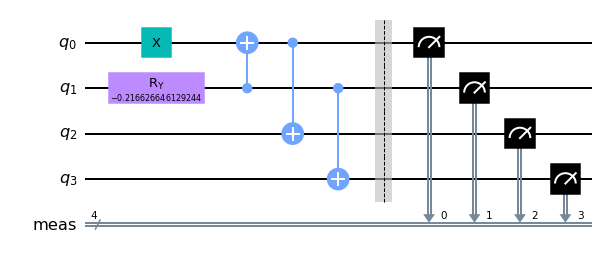

In [38]:
eigenstate_qc = varform.copy()
eigenstate_qc.measure_all()

param_dict = dict(zip(eigenstate_qc.parameters,opt_params))
eigenstate_qc = eigenstate_qc.assign_parameters(param_dict)

eigenstate_qc.draw('mpl')

We now execute this circuit.

In [39]:
execute_opts = {'shots' : 1024}
job = execute(eigenstate_qc,backend=qasm_simulator,**execute_opts)
result = job.result()
counts = result.get_counts(eigenstate_qc)

We will use the `plot_histogram` method from `qiskit.visualization` that takes the counts `dict` as an input. 

In [40]:
from qiskit.visualization import plot_histogram

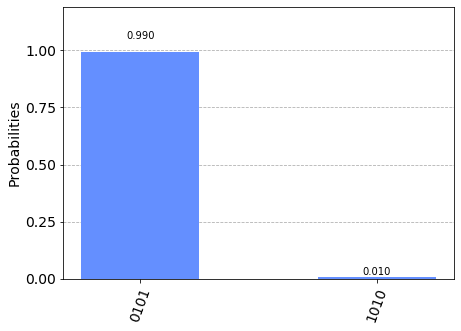

In [41]:
plot_histogram(counts)

We see that the found solution is mostly the state $|0101\rangle$ which is the Hartree-Fock solution when the 2-body Hamiltonian is not present. Adding this 2-body physics, shifts the energy down a bit by introducing a small contribution of $|1010\rangle$. The actual statevector has a `-` sign between these two states.

\begin{align}
\alpha_{0101}|0101\rangle - \alpha_{1010}|0101\rangle
\end{align}

But this is not something we can know from this. Fortunatly, H2 is a small system which can be solved exactly and we can find out this phase.

## Exact Solver (optional)

If you want to compare the value you get with the VQE algorithm it would be nice to have the exact value. If you were able to implement the `to_matrix()` method for `PauliString` and `LinearCombinaisonPauliString` then you can find the exact value of the ground state. All you need is to diagonalise the matrix reprensenting the whole Hamiltonian and find the lowest eigenvalue! Obviously this will not be possible to do for very large systems.

In [ ]:
hamiltonian_matrix_h2 = lcps_h2.to_matrix()
eig_values, eig_vectors = np.linalg.eigh(hamiltonian_matrix_h2)
eig_order = np.argsort(eig_values)
eig_values = eig_values[eig_order]
eig_vectors = eig_vectors[:,eig_order]
ground_state_value, ground_state_vector = eig_values[0], eig_vectors[:,0]
print('Ground state vector (exact) : ', ground_state_vector)
print('Ground state energy (electronic, exact) : ', ground_state_value)
print('Ground state energy (molecular, exact) : ', ground_state_value + energy_nuc)

Now you can complete the `ExactSolver` in the `Solver.py` file.

In [ ]:
from Solver import ExactSolver

In [ ]:
%autoreload
exact_solver = ExactSolver()
ground_state_value, ground_state_vector = exact_solver.lowest_eig_value(lcps_h2)
print('Ground state vector (exact) : ', ground_state_vector)
print('Ground state energy (electronic, exact) : ', ground_state_value)
print('Ground state energy (molecular, exact) : ', ground_state_value + energy_nuc)

What are the two basis state involved in the ground state? Let's plot the state vector using `matplotlib`.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig,ax = plt.subplots(1,1)
i_max = np.argmax(np.abs(ground_state_vector))
state = ground_state_vector * np.sign(ground_state_vector[i_max])
ax.bar(range(len(state)),np.abs(state),color=(np.real(state) > 0).choose(['r','b']))
plt.xticks(range(len(state)),[f"{i:04b}" for i in range(len(state))], size='small',rotation=60);

# What's next?

Now that you can find the ground state for a specific H2 molecule configuration (`d = 0.735`), you should be able to do that for many configurations, say `d = 0.2` to `2.5`. Doing that will enable you to plot the so-called dissociation curve : energy vs distance. Do not forget to include the Coulomb repulsion energy of the nucleus!

You could also run your algorithm on a noisy backend, either a noisy simulator or a real quantum computer. You've already seen on day 1 how to set/get a noisy backend. You'll see that noise messes things up pretty bad.

Running on real machine will introduce the problem of the qubit layout. You might want to change the `initial_layout` in the `execute_opts` so that your `varform` is not applying CNOT gates between qubits that are not connected. You know this needs to insert SWAP gate and this introduce more noise. Also covered in day 1.

To limit the effect of readout noise, you could add a `measure_filter` to your `evaluator`, so that each time you execute the `eval_circuits` you apply the filter to the results. Also covered in day 1.

Implement the simulatneous evaluation for bitwise commuting cliques or even for general commuting cliques.

Notebook by **Maxime Dion** <maxime.dion@usherbrooke.ca><br>
For the QSciTech-QuantumBC virtual workshop on gate-based quantum computing